In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [3]:
# unpacking
(train_data,train_labels),(test_data,test_labels) =mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [5]:
# Let's see the training data
print(f"Training sample :\n{train_data[0]}\n")
print(f"Training label :\n{train_labels[0]}\n")


Training sample :
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 

In [7]:
train_data.shape,train_labels.shape,test_data.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
train_data[0].shape,train_labels[0].shape

((28, 28), ())

label is 3


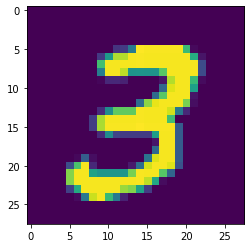

In [24]:
# plot a single image
import matplotlib.pyplot as plt
i=7
plt.imshow(train_data[i])
print(f"label is {train_labels[i]}")

In [22]:
class_names = ['0','1','2','3','4','5','6','7','8','9']
len(class_names)

10

Text(0.5, 1.0, '0')

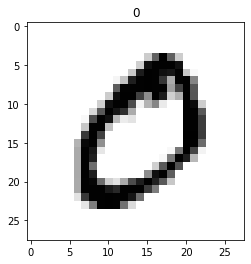

In [23]:
plt.imshow(train_data[1],cmap = plt.cm.binary)
plt.title(class_names[train_labels[1]])

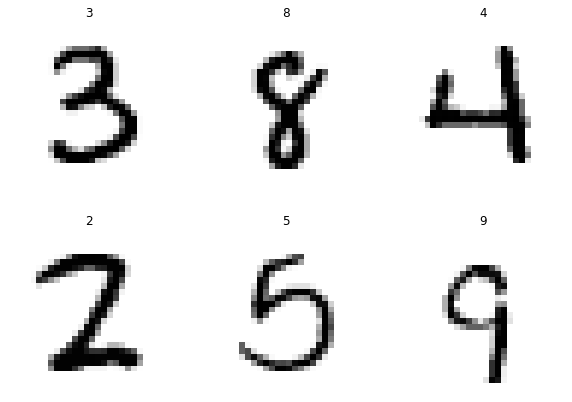

In [70]:
import random
plt.figure(figsize = (10,7))
for i in range(6):
    ax = plt.subplot(2,3,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

# Model|

In [28]:
tf.random.set_seed(48)

# Create
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_1.add(tf.keras.layers.Dense(4,activation='relu'))
model_1.add(tf.keras.layers.Dense(4,activation='relu'))
model_1.add(tf.keras.layers.Dense(10,activation='softmax'))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile
model_1.compile(
loss = tf.keras.losses.SparseCategoricalCrossentropy(),
optimizer = tf.keras.optimizers.Adam(),
metrics = ['accuracy']
)

In [30]:
# Fit
history_not_norm = model_1.fit(
train_data,train_labels,epochs = 10,
validation_data = (test_data,test_labels)    
)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2601 - accuracy: 0.1523 - val_loss: 2.0962 - val_accuracy: 0.1835
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9870 - accuracy: 0.2276 - val_loss: 1.8406 - val_accuracy: 0.2777
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7756 - accuracy: 0.3056 - val_loss: 1.6990 - val_accuracy: 0.3307
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5620 - accuracy: 0.4112 - val_loss: 1.3681 - val_accuracy: 0.5224
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2431 - accuracy: 0.5714 - val_loss: 1.1270 - val_accuracy: 0.6160
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0648 - accuracy: 0.6408 - val_loss: 1.0392 - val_accuracy: 0.6575
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0041 - accuracy: 0.6661 - val_loss: 0.9713 - val_accuracy:

### after 10 epochs :
the accuracy i got is : 88.72% on training set and 77.86% on test set


In [31]:
# Let's improve the model
train_data.min(),train_data.max()


(0, 255)

In [32]:
# Normalizing the data
train_data = train_data / train_data.max()
test_data = test_data / test_data.max()
train_data.min(),train_data.max()

(0.0, 1.0)

## Model 2

In [40]:
tf.random.set_seed(48)
model_2 = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),
tf.keras.layers.Dense(4,activation='relu'),
tf.keras.layers.Dense(4,activation='relu'),
tf.keras.layers.Dense(10,activation='softmax')                               
])
model_2.compile(
loss = tf.keras.losses.SparseCategoricalCrossentropy(),
optimizer = tf.keras.optimizers.Adam(),
metrics = ['accuracy']    
)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10 **(epoch/20))
norm_history = model_2.fit(
train_data,
train_labels,
epochs = 50,
validation_data = (test_data,test_labels),
callbacks = [lr_scheduler]    
)

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1755 - accuracy: 0.5894 - val_loss: 0.7592 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6683 - accuracy: 0.8052 - val_loss: 0.5877 - val_accuracy: 0.8365 - lr: 0.0011
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5734 - accuracy: 0.8357 - val_loss: 0.5386 - val_accuracy: 0.8501 - lr: 0.0013
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5311 - accuracy: 0.8473 - val_loss: 0.5108 - val_accuracy: 0.8569 - lr: 0.0014
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5093 - accuracy: 0.8528 - val_loss: 0.5140 - val_accuracy: 0.8518 - lr: 0.0016
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4941 - accuracy: 0.8569 - val_loss: 0.4855 - val_accuracy: 0.8606 - lr: 0.0018
Epoch 7/50
1875/1875 [==============================] - 4s

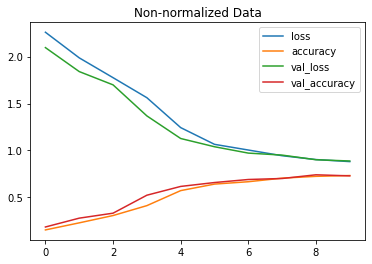

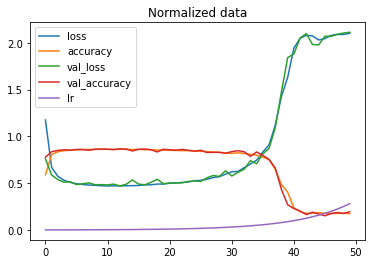

In [41]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(history_not_norm.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

Text(0.5, 1.0, 'Finding the ideal learning rate')

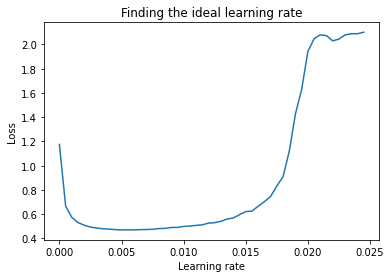

In [43]:
import numpy as np 
import matplotlib.pyplot as plt
lrs = 1e-3 * (10 * (np.arange(50)/20))
plt.plot(lrs,norm_history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

## Model_3

In [45]:
tf.random.set_seed(48)
model_3 = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),
tf.keras.layers.Dense(4,activation='relu'),
tf.keras.layers.Dense(4,activation='relu'),
tf.keras.layers.Dense(10,activation='softmax')                               
])
model_3.compile(
loss = tf.keras.losses.SparseCategoricalCrossentropy(),
optimizer = tf.keras.optimizers.Adam(lr=0.005),
metrics = ['accuracy']    
)
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10 **(epoch/20))
history = model_3.fit(
train_data,
train_labels,
epochs = 50,
validation_data = (test_data,test_labels)
#,callbacks = [lr_scheduler]    
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7664 - accuracy: 0.7539 - val_loss: 0.5589 - val_accuracy: 0.8356
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5464 - accuracy: 0.8373 - val_loss: 0.5089 - val_accuracy: 0.8456
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5156 - accuracy: 0.8486 - val_loss: 0.4896 - val_accuracy: 0.8651
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4981 - accuracy: 0.8537 - val_loss: 0.4673 - val_accuracy: 0.8661
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4856 - accuracy: 0.8569 - val_loss: 0.4980 - val_accuracy: 0.8552
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4788 - accuracy: 0.8611 - val_loss: 0.4638 - val_accuracy: 0.8711
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4727 - accuracy: 0.8626 - val_loss: 0.4825 - val_accuracy:

In [49]:
# Make predictions with the most recent model
y_probs = model_3.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

array([[5.4212971e-05, 1.3976834e-10, 9.8351143e-07, 1.7340475e-04,
        3.5072908e-08, 1.0948287e-05, 2.8575933e-11, 9.9941981e-01,
        6.9803874e-09, 3.4056752e-04],
       [4.8721091e-07, 2.8978786e-10, 9.9994278e-01, 5.5353314e-05,
        2.6573591e-23, 1.3139366e-07, 1.1776081e-06, 3.4522509e-20,
        1.1065532e-07, 1.9022742e-17],
       [1.5801160e-06, 9.3427658e-01, 3.8110085e-02, 8.6309062e-03,
        6.0430821e-04, 2.3094122e-04, 1.4946135e-04, 4.4156513e-03,
        4.9355282e-03, 8.6448900e-03],
       [9.9519426e-01, 7.5750552e-12, 2.5283494e-03, 2.4173546e-04,
        3.2508961e-08, 1.9270764e-03, 1.0732164e-04, 1.0932456e-06,
        3.5977894e-08, 1.9515646e-07],
       [4.5027242e-05, 3.5865572e-03, 5.1454786e-04, 3.0799070e-04,
        9.5965552e-01, 2.0207502e-03, 5.9685749e-03, 7.7550457e-04,
        1.5144156e-03, 2.5611071e-02]], dtype=float32)

In [50]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(7, '7')

In [51]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([7, 2, 1, 0, 4, 1, 4, 4, 6, 9])

In [52]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[ 880,    0,    7,   11,    4,   49,   19,    9,    1,    0],
       [   0, 1099,   11,    1,    0,    1,    1,    1,   20,    1],
       [  10,   23,  906,   42,    9,    1,    9,    8,   22,    2],
       [   2,    9,   39,  840,    3,   33,    0,   32,   39,   13],
       [   1,    6,    8,    0,  896,    3,   21,   11,    6,   30],
       [   6,    2,   12,   53,   12,  684,   15,   11,   63,   34],
       [  11,    1,   28,    0,   13,   17,  876,    0,   12,    0],
       [   0,   26,   11,   18,    8,    2,    0,  904,    0,   59],
       [   1,   32,    3,   40,   11,   69,    8,    4,  779,   27],
       [   1,    4,    4,   10,  118,   16,    1,   45,   13,  797]])

In [63]:
!git clone https://github.com/vivek005MB/HelperCodes.git


Cloning into 'HelperCodes'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [67]:
!mv /content/HelperCodes/confusionMatrix.py /content

In [68]:
# from confusionMatrix import make_confusion_matrix
import confusionMatrix


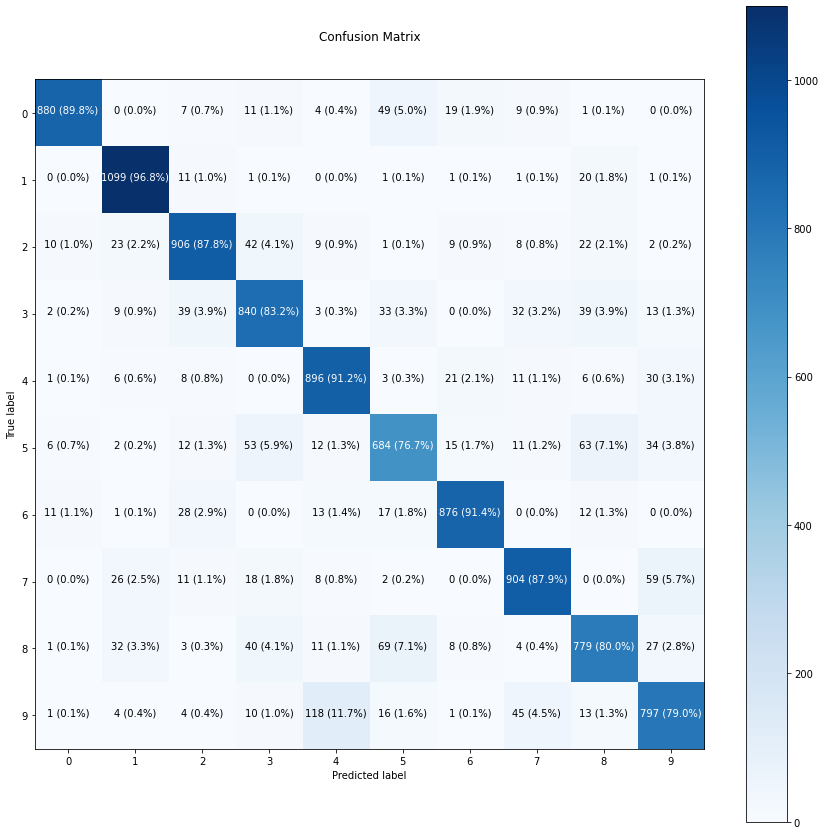

In [69]:
import numpy as np
# Make a prettier confusion matrix
confusionMatrix.make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

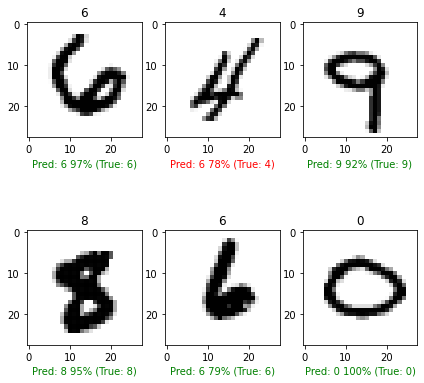

In [88]:
classes = class_names
true_labels = test_labels
plt.figure(figsize=(7,7))
for j in range(6):
    i = random.randint(0, len(test_data))
    ax = plt.subplot(2,3,j+1)
   
    # Create predictions and targets
    target_image = test_data[i]
    pred_probs = model_3.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    plt.imshow(test_data[i],cmap=plt.cm.binary)
    plt.title(class_names[test_labels[i]])
    plt.axis(True)
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red
